# Prediction using unsupervised ML


Objective : To find out the optimal number of clusters and present it visually.


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# getting the dataset
from sklearn import datasets
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now to find the optimum number of clusters we use the elbow method
In this we calculate the SSE to choose the accurate value of k for which the value of SSE decreases abruptly.

In [3]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
SSE = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

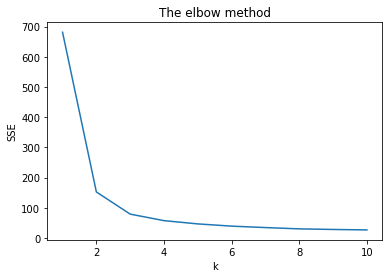

In [4]:
#Plotting the results onto a line graph to see the elbow
plt.plot(range(1, 11), SSE)
plt.title('The elbow method')
plt.xlabel('k')
plt.ylabel('SSE') # SSE is sum of square error
plt.show()

In [5]:
# Applying the K-Means classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

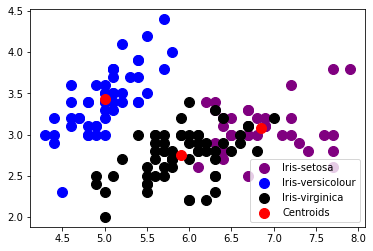

In [6]:
# Visualizing the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'black', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')                   # for the centriods
plt.legend()

Thank you!
